**<h1 style="text-align:center; color:#337fFF;"><font >MARKET SEGMENTATION</font></h1>**

<br>
<div style="text-align: right">
<font color="#006fFF" size=3>By: Ael-Dev</font><br>

<a id="section0"></a>
# <font color="#006fbb"> Introducción</font>
___

<img src="https://th.bing.com/th/id/OIP.h9wRekCeBO2eexD86l9LYAHaG8?w=604&h=567&rs=1&pid=ImgDetMain" alt="market_segmentation" style="display: block; margin: auto;">

Es una práctica que consiste en dividir el mercado objetivo en grupos con características, necesidades, intereses o comportamientos similares. Este proceso implica identificar los criterios de segmentación, analizar el mercado, seleccionar los segmentos más atractivos y diseñar estrategias para cada segmento, con el objetivo de entender mejor al público, adaptar los productos y la comunicación a sus preferencias, y optimizar el uso de los recursos de marketing. 

 

<a id="section1"></a>
# <font color="#006fbb">1. Descripción del Proyecto</font>
___

<a id="section11"></a>
## <font color="#006fbb">1.1. Objetivo</font>

* Desarrollar un modelo de segmentación de clientes, para brindar recomendaciones como planes de ahorro, prestamos, entre otros, sobre los grupos de clientes objetivo.

<a id="section12"></a>
## <font color="#006fbb">1.2. Acerca del Dataset</font>

| **Columna**                        | **Descripción**                                                                                     |
|------------------------------------|-----------------------------------------------------------------------------------------------------|
| **CUST_ID**                        | Identificador único del titular de la tarjeta de crédito.                                           |
| **BALANCE**                        | Saldo restante en la cuenta disponible para compras.                                                 |
| **BALANCE_FREQUENCY**              | Frecuencia de actualización del saldo (entre 0 y 1). 1 = actualizado con frecuencia, 0 = no actualizado con frecuencia. |
| **PURCHASES**                      | Monto total de compras en la cuenta.                                                                |
| **ONEOFF_PURCHASES**               | Monto de compras únicas (no en cuotas).                                                             |
| **INSTALLMENTS_PURCHASES**         | Monto de compras en cuotas.                                                                         |
| **CASH_ADVANCE**                   | Monto de avances en efectivo.                                                                        |
| **PURCHASES_FREQUENCY**            | Frecuencia de compras.                                                                              |
| **ONEOFF_PURCHASES_FREQUENCY**     | Frecuencia de compras únicas.                                                                       |
| **PURCHASES_INSTALLMENTS_FREQUENCY**| Frecuencia de compras en cuotas.                                                                    |
| **CASH_ADVANCE_FREQUENCY**         | Frecuencia de avances en efectivo.                                                                   |
| **CASH_ADVANCE_TRX**               | Número de transacciones de avances en efectivo.                                                      |
| **PURCHASES_TRX**                  | Número de transacciones de compras.                                                                  |
| **CREDIT_LIMIT**                   | Límite de crédito de la tarjeta.                                                                     |
| **PAYMENTS**                       | Monto total de pagos realizados.                                                                     |
| **MINIMUM_PAYMENTS**               | Pago mínimo requerido.                                                                               |
| **PRC_FULL_PAYMENT**               | Proporción de pagos completos realizados.                                                            |
| **TENURE**                         | Duración de la titularidad de la tarjeta.                                                            |


<a id="section13"></a>
## <font color="#006fbb">1.3. Herramientas Tecnológicas</font>

* Python
* Jupyter Notebook
* Scikit-learn
* Streamlit

<a id="section14"></a>
## <font color="#006fbb">1.4. Algoritmos a Utilizar</font>

* K-Means Clustering
* DBSCAN Clustering
* Spectral Clustering
* Agglomerative Clustering
* Gaussian Mixture Model Based Clustering

<a id="section2"></a>
# <font color="#006fbb"> 2. Importar Librerias</font>
___

In [3]:
#https://www.youtube.com/watch?v=WhUfhOBKjEU

In [4]:
# Importar las librerías necesarias para el proyecto de machine learning
import pandas as pd  # Para manipulación de datos
import numpy as np  # Para operaciones numéricas
import seaborn as sns  # Para visualización de datos
import matplotlib.pyplot as plt  # Para gráficos

# pre-procesamiento
from sklearn.impute import KNNImputer

# Transformación y escalado de características
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

# Reducción de dimensionalidad
from sklearn.decomposition import PCA

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

# Evaluación de modelos y métricas
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import classification_report
from sklearn import metrics

# Modelos de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Supresión de advertencias (opcional)
import warnings
warnings.filterwarnings("ignore")

<a id="section3"></a>
# <font color="#006fbb"> 3. Cargar Dataset</font>
___

In [5]:
df_raw = pd.read_csv("../../data/Customer.csv")
df_raw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Mostrar información

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Mostrar resumen estadístico

In [7]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


<a id="section5"></a>
# <font color="#006fbb"> 5. Pre-procesamiento de Datos</font>
___

### Eliminar columnas que no aportan informacion al modelo

In [8]:
del df_raw['CUST_ID']

### Verificar presencia de datos faltantes

In [9]:
df_raw.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Tratamiento de datos faltantes

In [10]:
# Eliminando dato faltante en la columna "CREDIT_LIMIT"
df = df_raw.copy()
df = df.dropna(subset=['CREDIT_LIMIT'])

# Aplicando técnica de knn para la columna "MINIMUM_PAYMENTS"
# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=3)

# Impute missing values in 'MINIMUM_PAYMENTS' column
df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])

print(df.isnull().sum())
print(df.shape)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
(8949, 17)


### Verificar presencia de datos duplicados

In [11]:
df.duplicated().sum()

0


<a id="section4"></a>
# <font color="#006fbb"> 4. Análisis Exploratorio de los Datos</font>
___

### Histograma

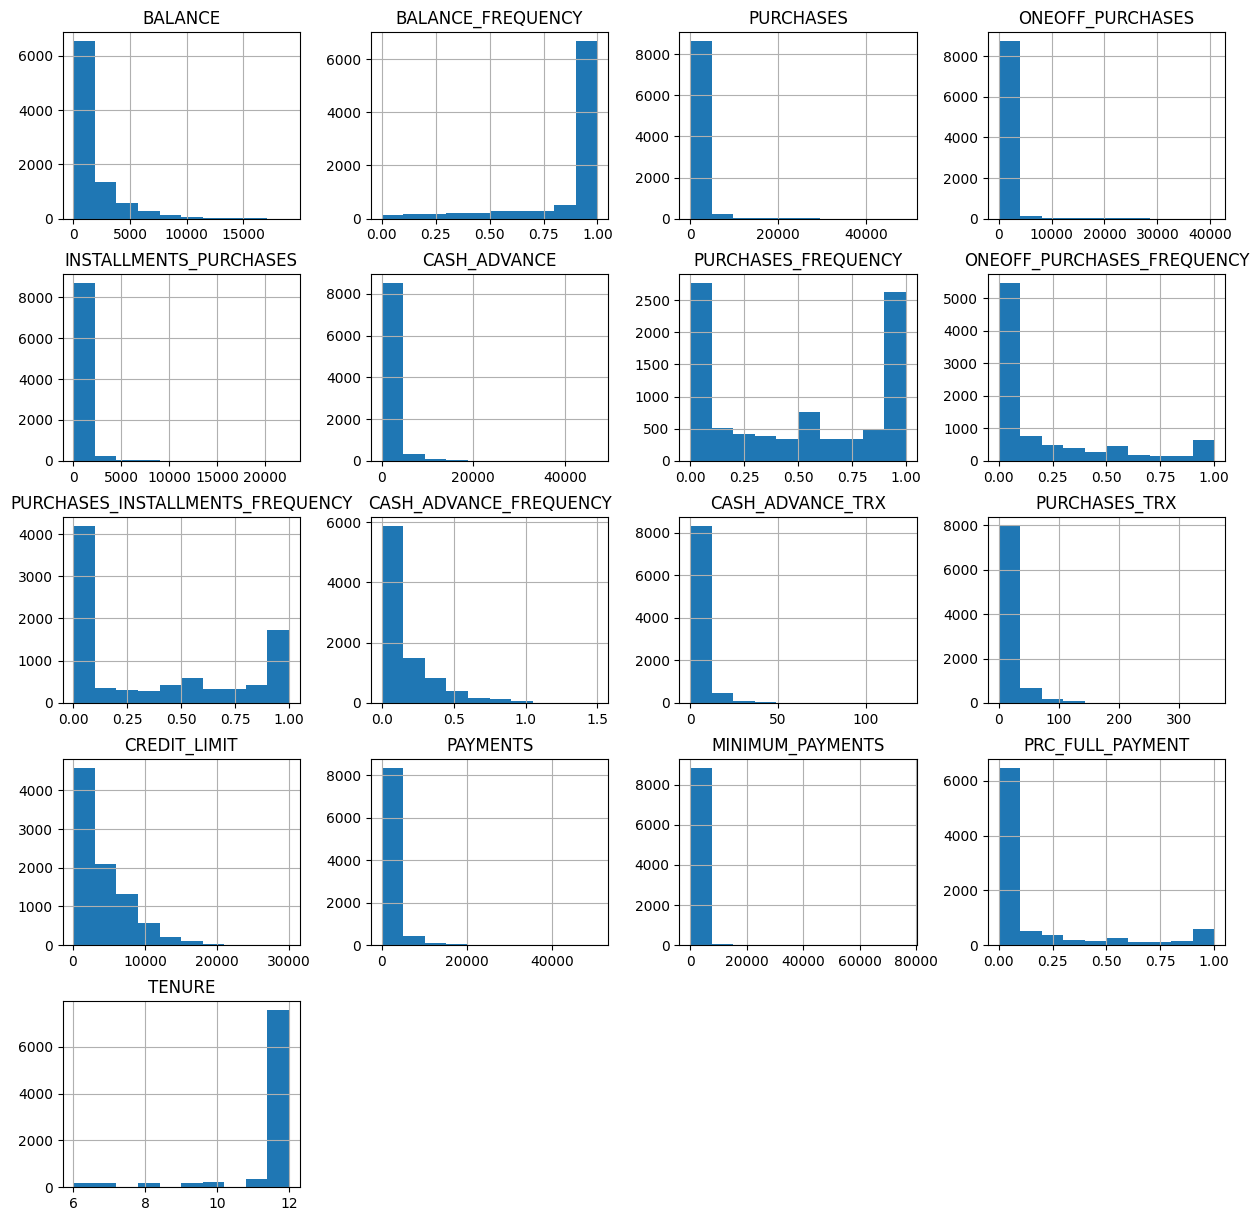

In [12]:
# Univariate Histograms
fig = plt.figure(figsize=(15,15)) # tamaño del lienzo
ax = fig.gca() # formatear para agrandar la figura
df.hist(ax=ax)
plt.show()

### Diagrama de densidad

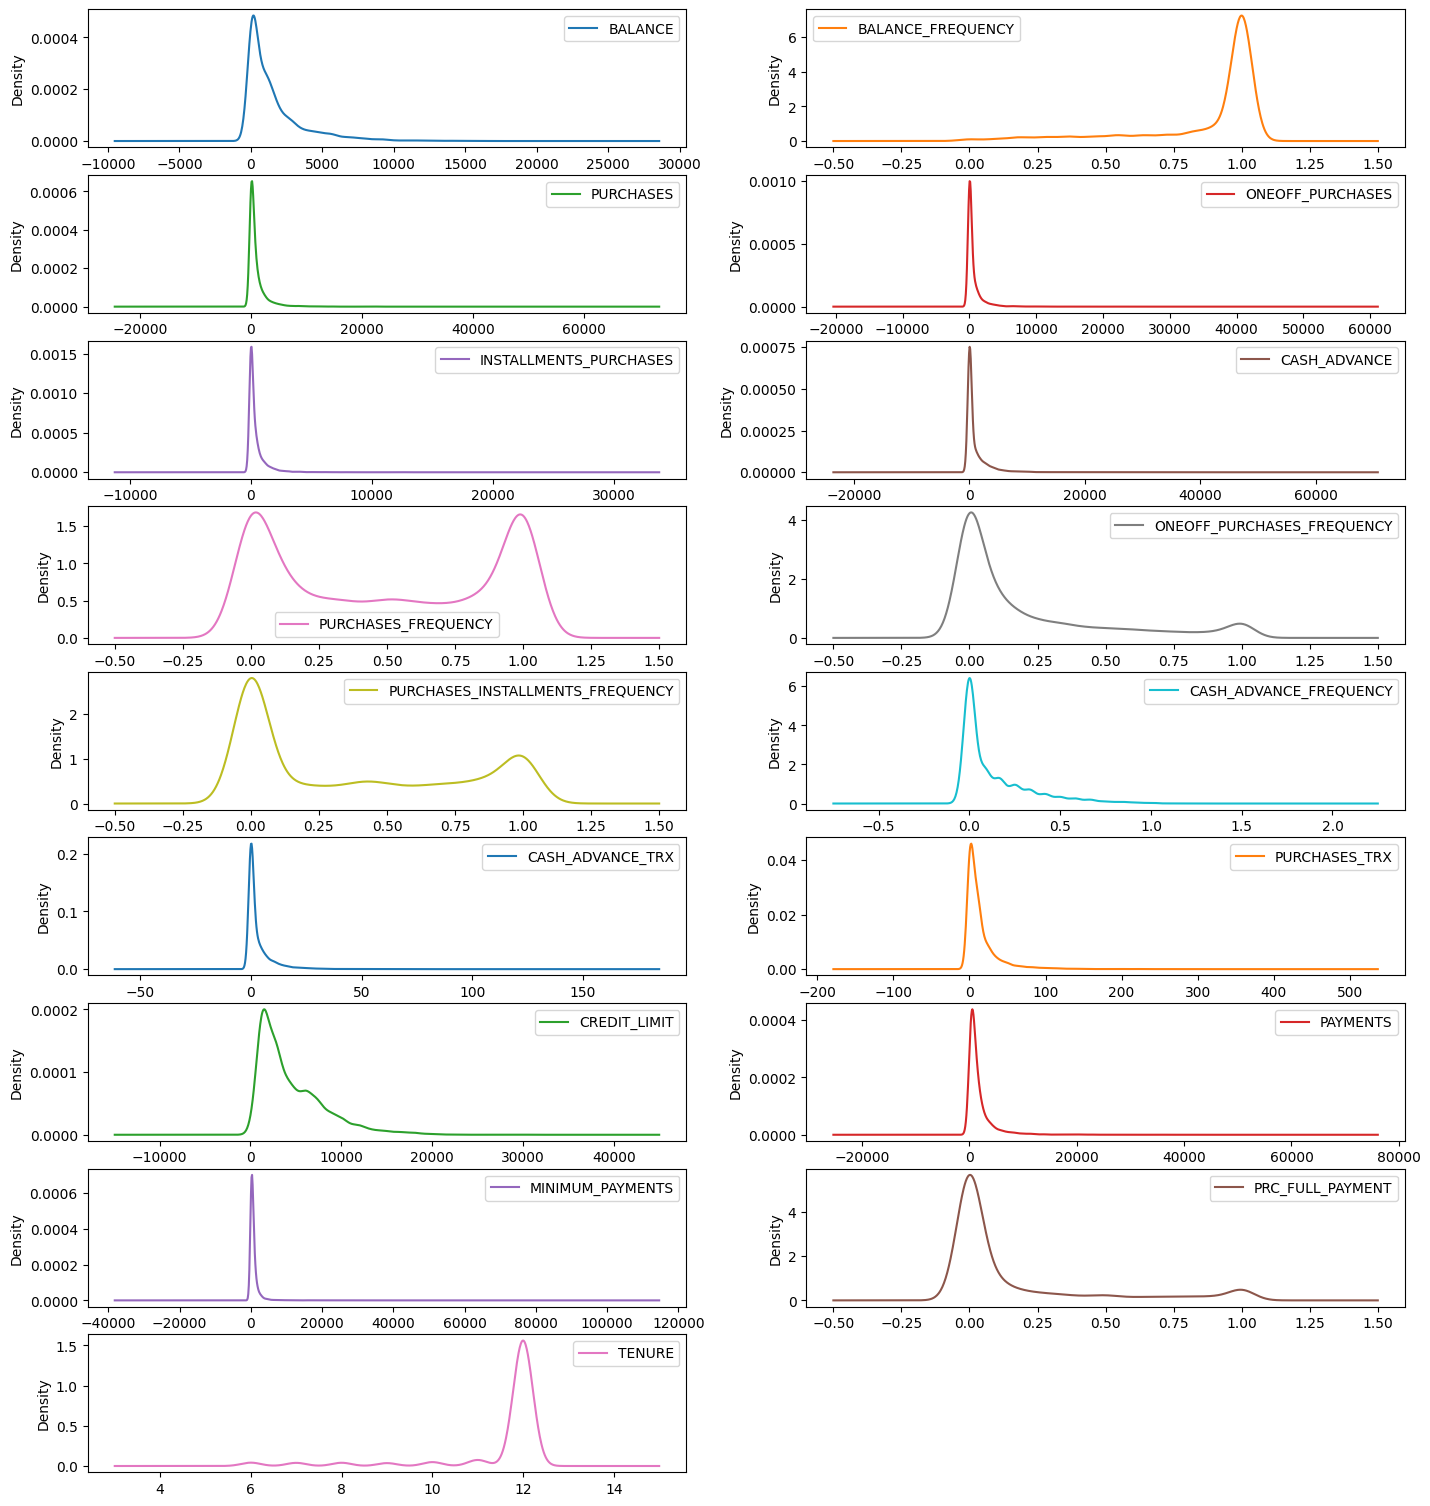

In [13]:
%matplotlib inline
# Univariate Histograms
fig = plt.figure(figsize=(17,19))
ax = fig.gca()
df.plot(ax=ax, kind='density', subplots=True, layout= (9,2), sharex=False)
plt.show()

### boxplot

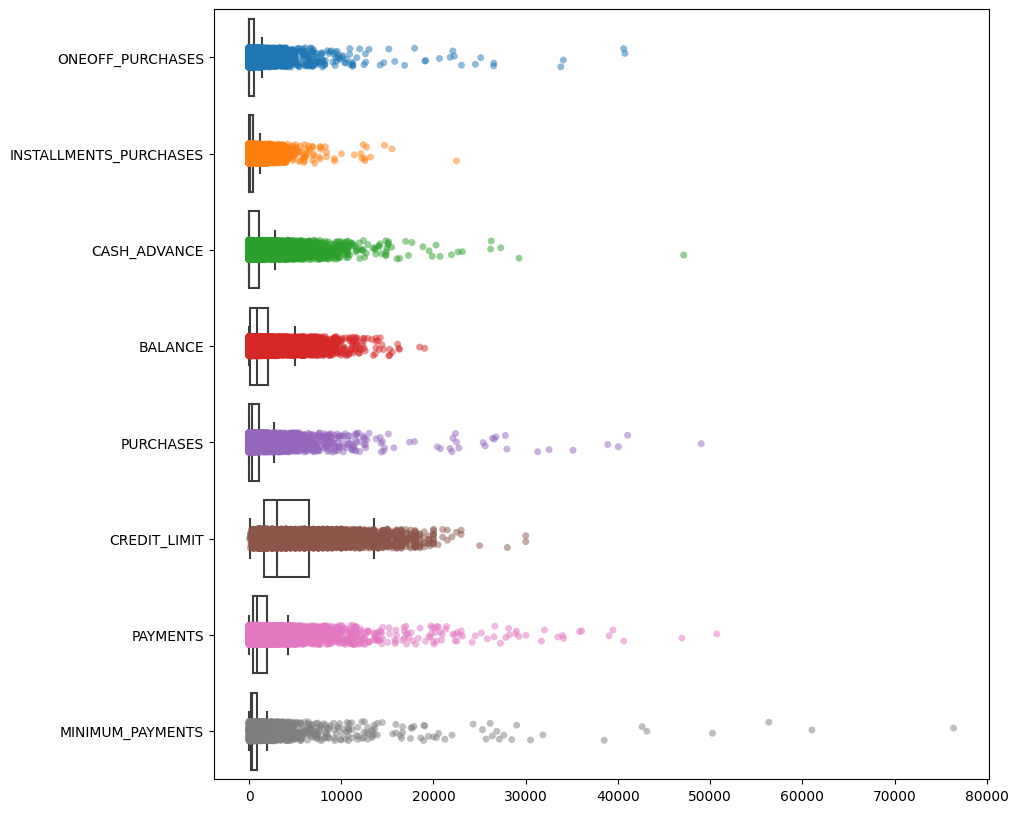

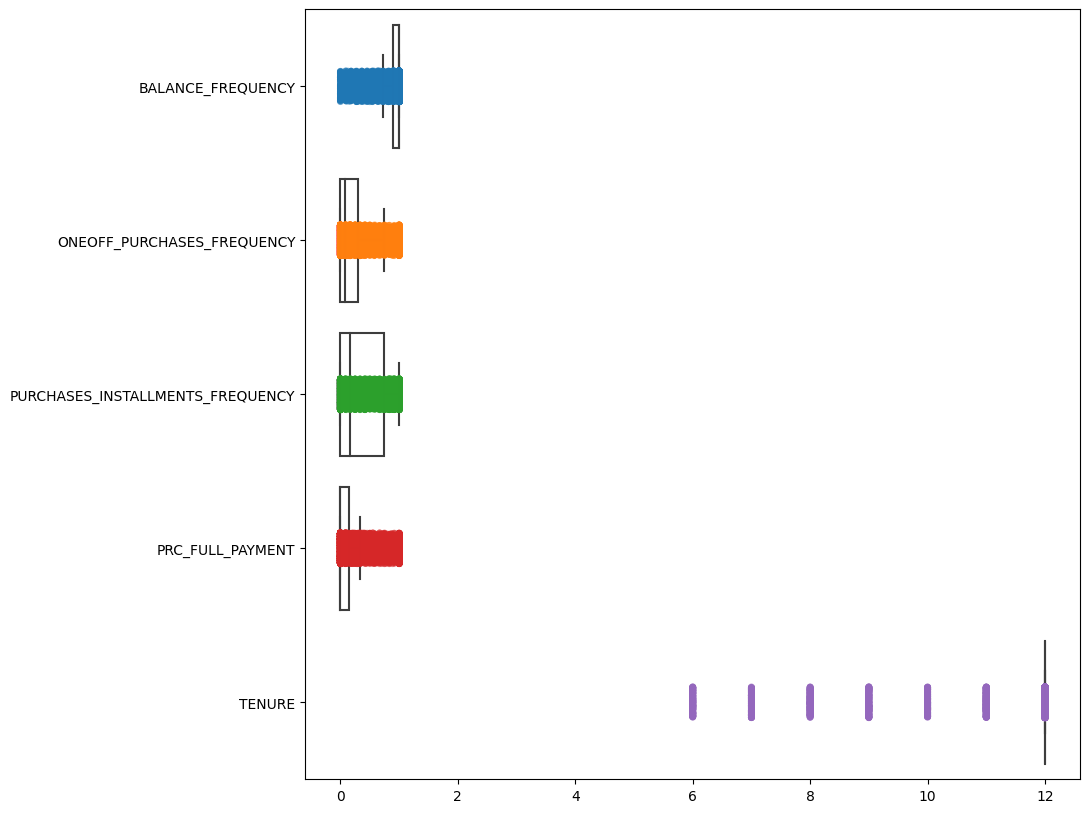

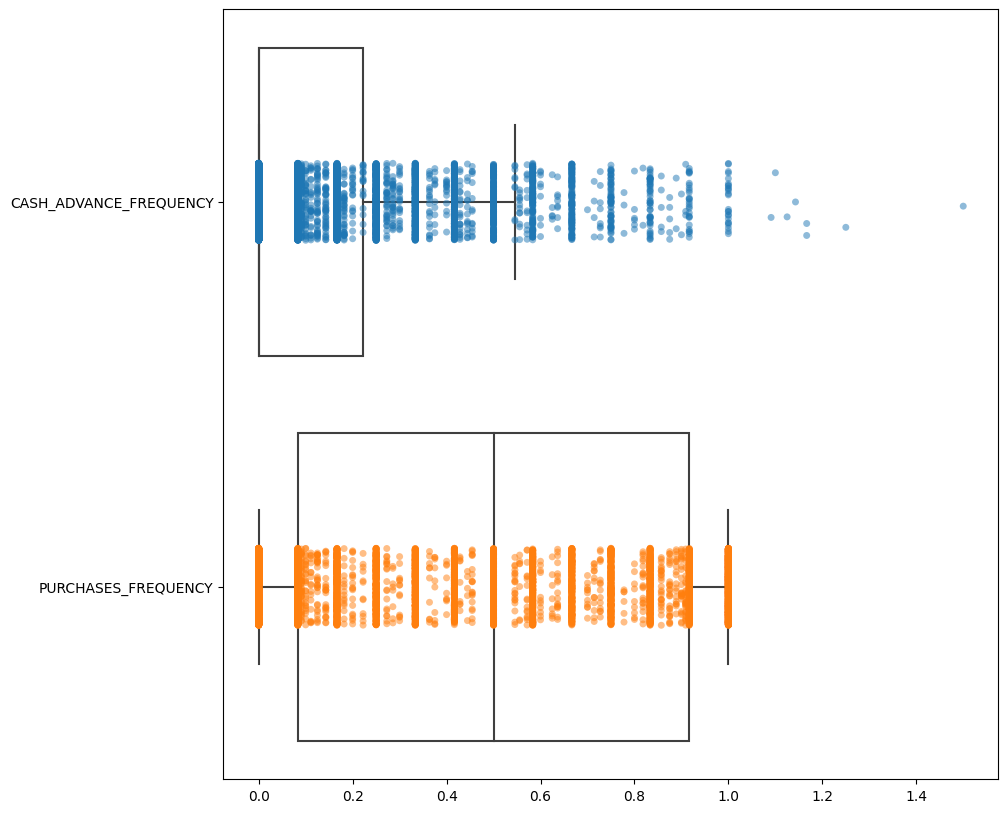

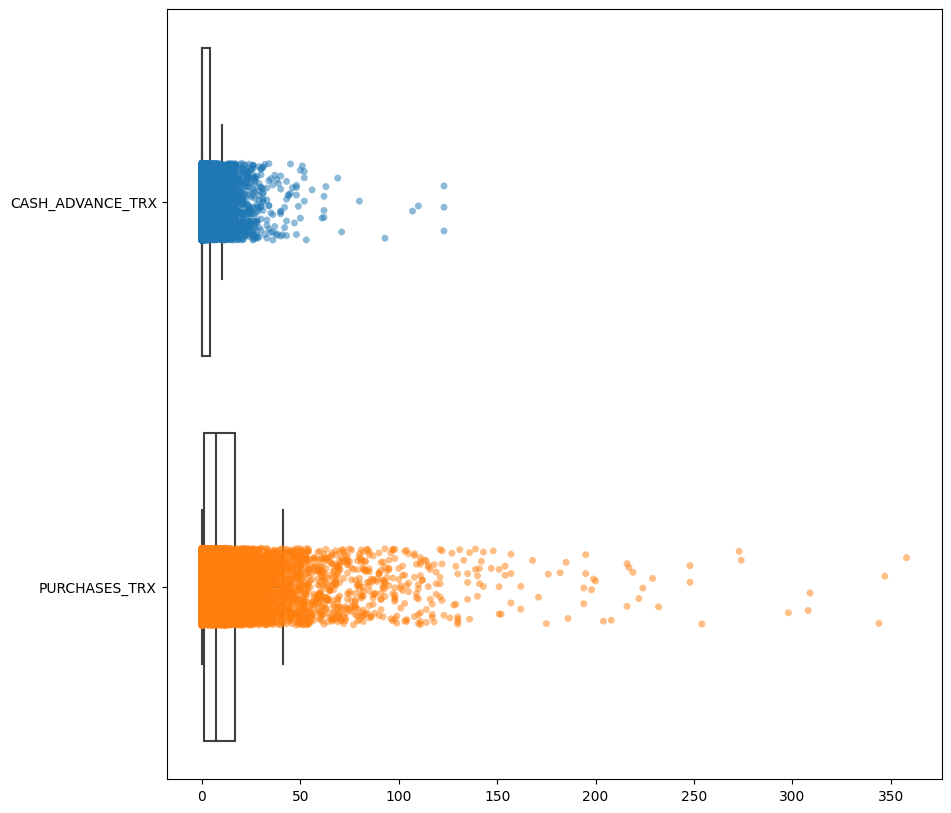

In [36]:
columns1 = [ 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
             'BALANCE', 'PURCHASES','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
columns2 = ['BALANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY','PRC_FULL_PAYMENT', 'TENURE']
columns3 = ['CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY']
columns4 = ['CASH_ADVANCE_TRX', 'PURCHASES_TRX']

# Plot the first 3 columns
plt.figure(figsize=(10,10))
sns.boxplot(data=df[columns1[:]], orient='h', fliersize=0,boxprops={'fill': None}) # boxplot sin color
sns.stripplot(data=df[columns1[:]], orient='h', alpha=0.5) # puntos con color
plt.show()

# Plot the remain columns
plt.figure(figsize=(10,10))
sns.boxplot(data=df[columns2[:]], orient='h', fliersize=0,boxprops={'fill': None}) # boxplot sin color
sns.stripplot(data=df[columns2[:]], orient='h', alpha=0.5) # puntos con color
plt.show()

# Plot the remain columns
plt.figure(figsize=(10,10))
sns.boxplot(data=df[columns3[:]], orient='h', fliersize=0,boxprops={'fill': None}) # boxplot sin color
sns.stripplot(data=df[columns3[:]], orient='h', alpha=0.5) # puntos con color
plt.show()

# Plot the remain columns
plt.figure(figsize=(10,10))
sns.boxplot(data=df[columns4[:]], orient='h', fliersize=0,boxprops={'fill': None}) # boxplot sin color
sns.stripplot(data=df[columns4[:]], orient='h', alpha=0.5) # puntos con color
plt.show()



### scatterplot


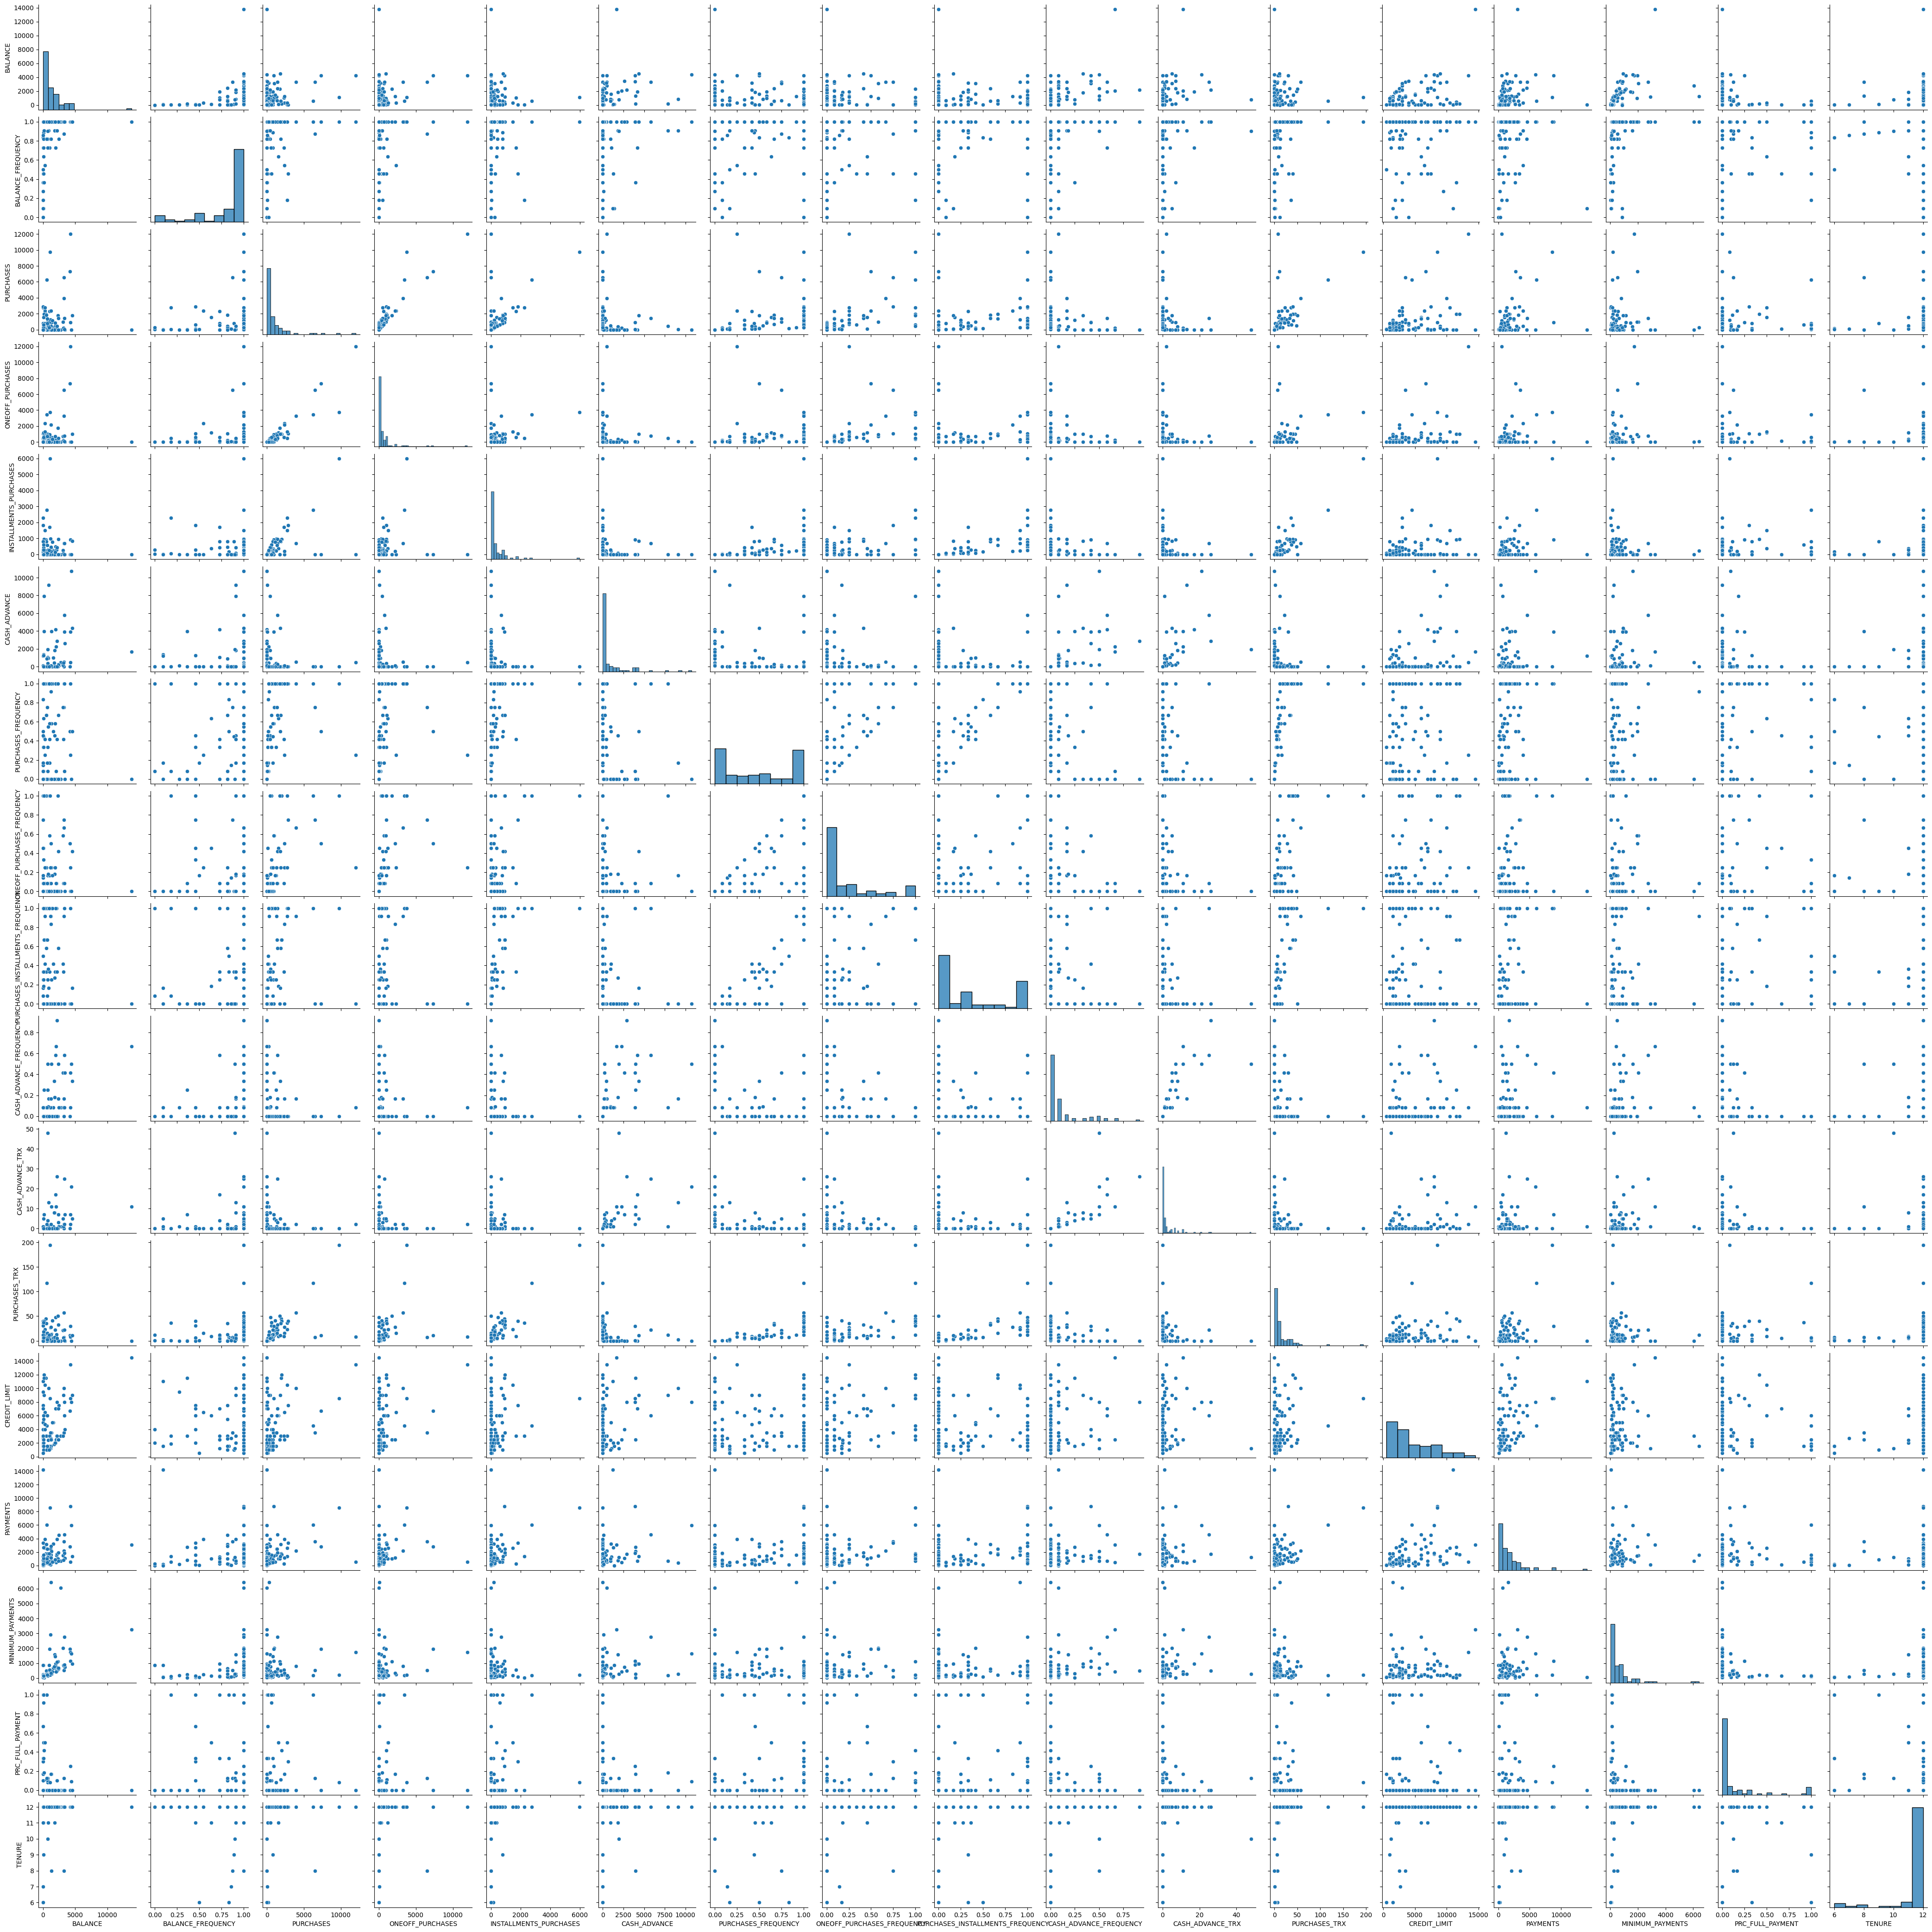

In [23]:
# Tomar una muestra aleatoria del 1% de los datos
df_sample = df.sample(frac=0.01, random_state=42)

# Crear el pairplot con la muestra
sns.pairplot(df_sample)
plt.show()

### Matriz de correlación

[]

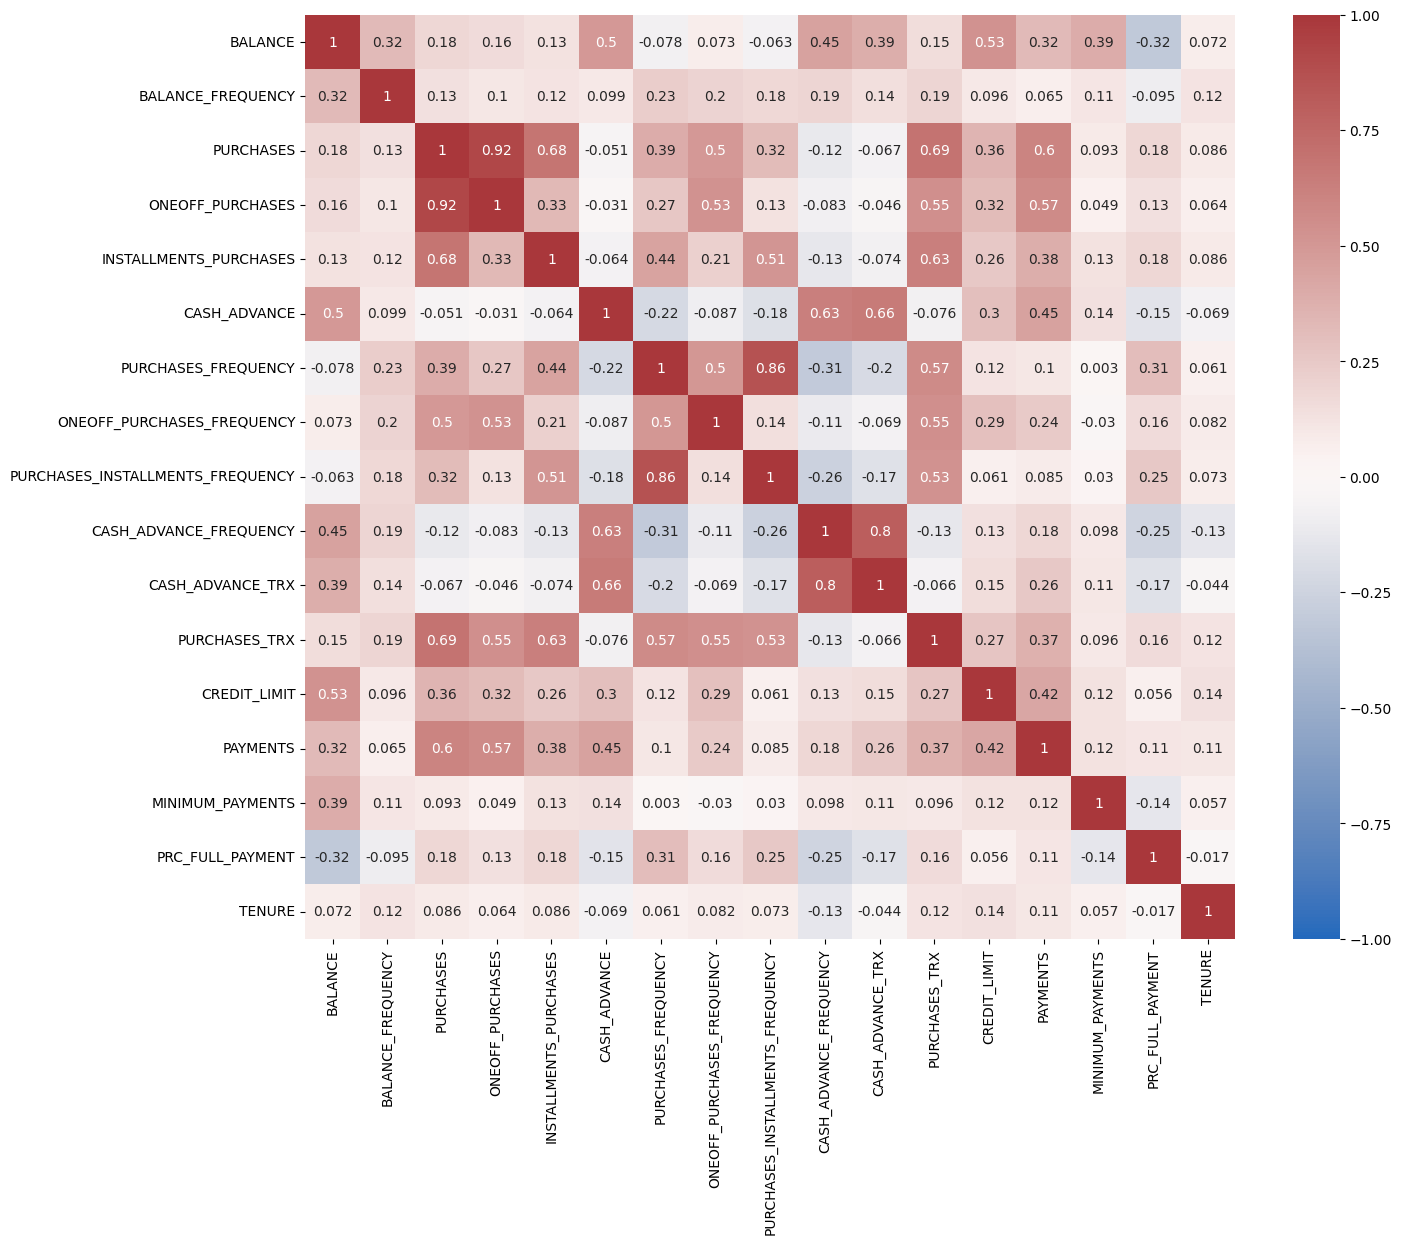

In [40]:
corr = df.corr().round(3)
# Crear el gráfico circular con seaborn
plt.figure(figsize=(15,12))
sns.heatmap(data=corr, cmap='vlag', annot=True, vmin=-1, vmax=1)
plt.plot()


<a id="section6"></a>
# <font color="#006fbb"> 6. Construccion y Evaluación de los modelos</font>
___


<a id="section7"></a>
# <font color="#006fbb"> 7. Implementación</font>
___